In [1]:
import os 
import re
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('default')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
plt.rcParams["figure.autolayout"] = True
plt.rcParams['pdf.fonttype'] = 42

In [4]:
val_tbl = pd.read_excel("0223_LDLvar_Individual_FACSsummary.xlsx", sheet_name="Target summary")

In [5]:
result_path = "../../results/model_runs/bean_count_LDLvar_annotated_complete/all_scores.csv"
result_tbl = pd.read_csv(result_path)

In [6]:
result_tbl.columns.tolist()

['Unnamed: 0',
 'index',
 'target_Normal',
 'Unnamed: 0_Normal',
 'target_variant_Normal',
 'target_group_Normal',
 'target_group2_Normal',
 'edit_rate_mean_Normal',
 'edit_rate_std_Normal',
 'mu_Normal',
 'mu_sd_Normal',
 'mu_z_Normal',
 'sd_Normal',
 'novl_Normal',
 'mu_adj_Normal',
 'mu_sd_adj_Normal',
 'mu_z_adj_Normal',
 'novl_adj_Normal',
 'neg_mu_z_Normal',
 'index.1',
 'target_MixtureNormal',
 'Unnamed: 0_MixtureNormal',
 'target_variant_MixtureNormal',
 'target_group_MixtureNormal',
 'target_group2_MixtureNormal',
 'edit_rate_mean_MixtureNormal',
 'edit_rate_std_MixtureNormal',
 'mu_MixtureNormal',
 'mu_sd_MixtureNormal',
 'mu_z_MixtureNormal',
 'sd_MixtureNormal',
 'novl_MixtureNormal',
 'mu_adj_MixtureNormal',
 'mu_sd_adj_MixtureNormal',
 'mu_z_adj_MixtureNormal',
 'novl_adj_MixtureNormal',
 'neg_mu_z_MixtureNormal',
 'index.2',
 'target_MixtureNormal+Acc',
 'Unnamed: 0_MixtureNormal+Acc',
 'target_variant_MixtureNormal+Acc',
 'target_group_MixtureNormal+Acc',
 'target_group

# Fullsort result


In [7]:
result_tbl['rra_lfc'] = -result_tbl["pos|lfc_rra_bot"]

In [8]:
result_tbl['nLFC'] = result_tbl['rra_lfc']/result_tbl['edit_rate_mean_Normal']

In [9]:
plot_tbl = result_tbl.merge(val_tbl, left_on='target_Normal', right_on='Full target name')

# guide

In [10]:
val_guide_tbl = pd.read_excel("0223_LDLvar_Individual_FACSsummary.xlsx", sheet_name="all data")

In [11]:
tbl= pd.read_csv("../../results/model_runs/bean_negctrl/bean_run_result.bean_count_LDLvar_annotated/bean_element_result.MixtureNormal+Acc.csv")

In [12]:
tbl.loc[tbl.target.map(lambda s: "rs350" in s or "rs704" in s or "rs812" in s)]

,Unnamed: 0,target,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,novl,mu_scaled,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj
130,130,rs704_Min_ABE_550,rs704,Variant,Variant,0.494735,0.112786,0.264494,0.147014,1.799099,...,0.731131,0.268448,0.148207,1.811297,1.007748,0.729609,0.268448,0.147536,1.819538,0.730596
433,433,rs8126001_Min_ABE_574,rs8126001,Variant,Variant,0.287359,0.140826,0.152260,0.100396,1.516590,...,0.799516,0.155303,0.101211,1.534452,1.006079,0.798241,0.155303,0.100752,1.541434,0.799002
568,568,rs35081008_Min_ABE_465,rs35081008,Variant,Variant,0.489127,0.176691,0.136426,0.062680,2.176550,...,0.865214,0.139340,0.063188,2.205159,1.003120,0.864322,0.139340,0.062902,2.215193,0.864850


In [13]:
bean_plot_tbl = tbl.merge(val_tbl, left_on='target', right_on='Full target name')

In [14]:
guide = pd.read_csv("../../results/model_runs/bean_negctrl/bean_run_result.bean_count_LDLvar_annotated/bean_sgRNA_result.MixtureNormal+Acc.csv")

In [15]:
dark_pal = sns.color_palette('dark')
pal = sns.color_palette('colorblind')
method_pal = {
    "Normal": pal[2],
    "MixtureNormal": pal[0],
    "MixtureNormal+Acc": pal[-1],
    "MixtureNormal+Acc2": pal[-2],
    "MAGeCK-MLE": pal[3],
    "MAGeCK-MLE+edit rate": pal[1],
    "MAGeCK-MLE+edit rate (fitted)": pal[5],
    "EC-LFC": pal[-3],
    "MAGeCK-RRA":dark_pal[-3],
    
}

plt.style.use('jr')
fig, ax = plt.subplots(figsize=(4,4))

sns.scatterplot(plot_tbl, x="Combined Target median LFC", y="mu_MixtureNormal+Acc", color=method_pal["MixtureNormal+Acc"])
ax.set_ylabel("BEAN mu")
ax.set_xlabel("FACS signal LFC")
ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.set_box_aspect(1)
col='rra_lfc'

ax.set_box_aspect(1)
ax.text(-0.95, 0.65, f"R={plot_tbl[['Combined Target median LFC', 'mu_MixtureNormal+Acc']].corr('spearman').iloc[0,1]:.2f}")
#ax.legend(loc='center left', bbox_to_anchor=(0, 0.9))
fig.savefig("Correlation_plot.pdf", bbox_inches="tight")

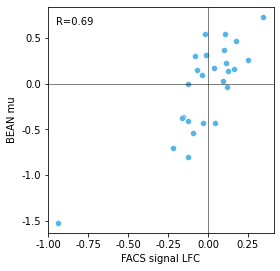

In [16]:
plt.style.use('jr')
fig, ax = plt.subplots(figsize=(4,4))

sns.scatterplot(bean_plot_tbl, x="Combined Target median LFC", y="mu", color=method_pal["MixtureNormal+Acc"])
ax.set_ylabel("BEAN mu")
ax.set_xlabel("FACS signal LFC")
ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.set_box_aspect(1)
col='rra_lfc'

ax.set_box_aspect(1)
ax.text(-0.95, 0.65, f"R={plot_tbl[['Combined Target median LFC', 'mu_MixtureNormal+Acc']].corr('spearman').iloc[0,1]:.2f}")
#ax.legend(loc='center left', bbox_to_anchor=(0, 0.9))
#fig.savefig("Correlation_plot.pdf", bbox_inches="tight")
bean_plot_tbl[["Combined Target median LFC", "mu"]].to_csv("3d.csv")

In [19]:
mageck_label_map_beta = {
    "sort_num|beta_sort_var_":"MAGeCK-MLE",
    "sort_num|beta_sort_var_EM":"MAGeCK-MLE+edit rate",
    "sort_num|beta_sort_var_EMf":"MAGeCK-MLE+edit rate (fitted)",
}

method_label_map_beta = {
    "mu_MixtureNormal+Acc":"MixtureNormal+Acc",
    "mu_MixtureNormal":"MixtureNormal",
    "mu_Normal":"Normal",
    "sort_num|beta_sort_var_":"MAGeCK-MLE",
    "sort_num|beta_sort_var_EM":"MAGeCK-MLE+edit rate",
    "sort_num|beta_sort_var_EMf":"MAGeCK-MLE+edit rate (fitted)",
    "nLFC":"EC-LFC",
    "rra_lfc":"MAGeCK-RRA",
    
}

In [23]:
source_tbl = plot_tbl[['Combined Target median LFC'] + list(method_label_map_beta.keys())]
source_tbl.columns = ["LFC"] + list(method_label_map_beta.values())
source_tbl.to_csv("E5.csv")

In [106]:
corr_df

,metric,corr,method
0,mu_MixtureNormal+Acc,0.688205,MixtureNormal+Acc
1,mu_MixtureNormal,0.679316,MixtureNormal
2,mu_Normal,0.679316,Normal
3,sort_num|beta_sort_var_,0.591111,MAGeCK-MLE
4,sort_num|beta_sort_var_EM,0.591111,MAGeCK-MLE+edit rate
5,sort_num|beta_sort_var_EMf,0.530256,MAGeCK-MLE+edit rate (fitted)
6,nLFC,0.547350,EC-LFC
7,rra_lfc,0.548034,MAGeCK-RRA
8,mu_Normal,0.679316,Normal
9,mu_MixtureNormal,0.679316,MixtureNormal


Text(0, 0.5, 'Spearman R')

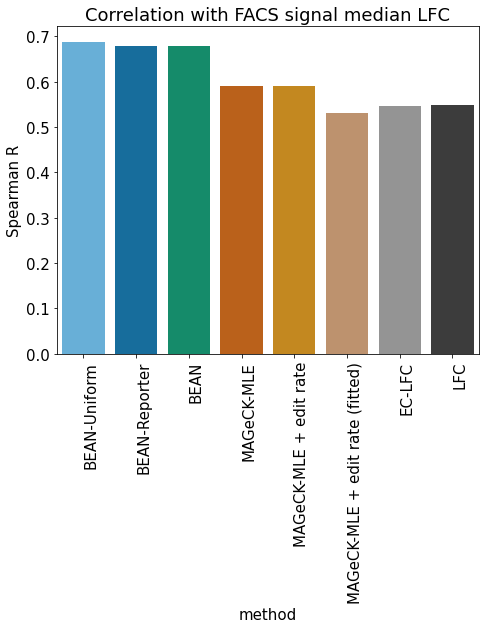

In [105]:
plt.style.use('jr')
fig, ax = plt.subplots(figsize=(7,9))

bean_models = ["Normal", "MixtureNormal", "MixtureNormal+Acc"]
bean_models_draw = ["Normal", "MixtureNormal+Acc"]

corr_df = plot_tbl[list(method_label_map_beta.keys()) + [f"mu_{m}" for m in bean_models] +['rra_lfc'] + ["Combined Target median LFC"]].astype(float).corr('spearman').iloc[-1,:-1].reset_index()
corr_df.columns=['metric', 'corr']
corr_df['method'] = corr_df.metric.map(method_label_map_beta)

sns.barplot(corr_df, x='method', y = 'corr', ax = ax, color='method', palette=method_pal)
ax.set_xticklabels(
    labels=["BEAN-Uniform", "BEAN-Reporter", "BEAN", "MAGeCK-MLE", "MAGeCK-MLE + edit rate", "MAGeCK-MLE + edit rate (fitted)", "EC-LFC", "LFC"],   
    rotation=90,         
    ha="right",  
    rotation_mode="anchor")
ax.set_title("Correlation with FACS signal median LFC")
ax.set_ylabel("Spearman R")
#fig.savefig("S4b_correlation_bar.pdf",bbox_inches='tight')

In [30]:
corr_df

,metric,corr,method
0,mu_MixtureNormal+Acc,0.679316,MixtureNormal+Acc
1,mu_MixtureNormal,0.711453,MixtureNormal
2,mu_Normal,0.679316,Normal
3,sort_num|beta_sort_var_,0.591111,MAGeCK-MLE
4,sort_num|beta_sort_var_EM,0.591111,MAGeCK-MLE+edit rate
5,sort_num|beta_sort_var_EMf,0.530256,MAGeCK-MLE+edit rate (fitted)
6,rra_lfc,0.548034,MAGeCK-RRA
7,mu_Normal,0.679316,Normal
8,mu_MixtureNormal,0.711453,MixtureNormal
9,mu_MixtureNormal+Acc,0.679316,MixtureNormal+Acc


In [31]:
prefix="../../results/model_runs/{}/all_scores.csv"
comb_dirs=[]
reg_compile = re.compile(r"bean_count_LDLvar_annotated_complete_rep\d*_rep\d*")
for dirname in os.listdir("../../results/model_runs/"):
    if reg_compile.match(dirname):
        comb_dirs.append(dirname)

comb_dirs

['bean_count_LDLvar_annotated_complete_rep5_rep15',
 'bean_count_LDLvar_annotated_complete_rep14_rep15',
 'bean_count_LDLvar_annotated_complete_rep10_rep14',
 'bean_count_LDLvar_annotated_complete_rep5_rep11',
 'bean_count_LDLvar_annotated_complete_rep10_rep15',
 'bean_count_LDLvar_annotated_complete_rep5_rep12',
 'bean_count_LDLvar_annotated_complete_rep11_rep14',
 'bean_count_LDLvar_annotated_complete_rep10_rep12',
 'bean_count_LDLvar_annotated_complete_rep11_rep12',
 'bean_count_LDLvar_annotated_complete_rep5_rep14',
 'bean_count_LDLvar_annotated_complete_rep12_rep15',
 'bean_count_LDLvar_annotated_complete_rep5_rep10',
 'bean_count_LDLvar_annotated_complete_rep12_rep14',
 'bean_count_LDLvar_annotated_complete_rep10_rep11',
 'bean_count_LDLvar_annotated_complete_rep11_rep15']

In [76]:
def get_corr(scores: pd.DataFrame, col_labels, method_label_map, strongest_splicing=False):
    f1s = {}
    scores = scores.rename(columns={"Group2_Normal":"target_group2_Normal", "Target gene/variant_Normal":"target_variant_Normal"})
    scores['rra_lfc'] = -scores["pos|lfc_rra_bot"]
    scores['nLFC'] = scores['rra_lfc']/scores['edit_rate_mean_Normal']
    scores = scores.merge(val_tbl, left_on='target_Normal', right_on='Full target name')
    corr_df = scores[list(method_label_map_beta.keys()) + [f"mu_{m}" for m in bean_models] + ['rra_lfc'] + ["Combined Target median LFC"]].astype(float).corr('spearman').iloc[-1,:-1].reset_index()
    corr_df.columns=['metric', 'corr']
    corr_df['method'] = corr_df.metric.map(method_label_map_beta)
    return corr_df

def get_corrs(prefix: str, file_labels, method_label_map, strongest_splicing=False):
    score_tbls = []
    corr_list = []
    for file_label in file_labels:
        score_tbl = pd.read_csv(prefix.format(file_label))
        res = get_corr(score_tbl, method_label_map.keys(), method_label_map, strongest_splicing=strongest_splicing)
        corr_list.append(res)
    return pd.concat(corr_list)

In [77]:
corr_subsamples = get_corrs(prefix, comb_dirs, method_label_map_beta)

In [78]:
corr_subsamples

,metric,corr,method
0,mu_MixtureNormal+Acc,0.628034,MixtureNormal+Acc
1,mu_MixtureNormal,0.736068,MixtureNormal
2,mu_Normal,0.584957,Normal
3,sort_num|beta_sort_var_,0.437265,MAGeCK-MLE
4,sort_num|beta_sort_var_EM,0.437265,MAGeCK-MLE+edit rate
...,...,...,...
7,rra_lfc,0.503590,MAGeCK-RRA
8,mu_Normal,0.477607,Normal
9,mu_MixtureNormal,0.325128,MixtureNormal
10,mu_MixtureNormal+Acc,0.377778,MixtureNormal+Acc


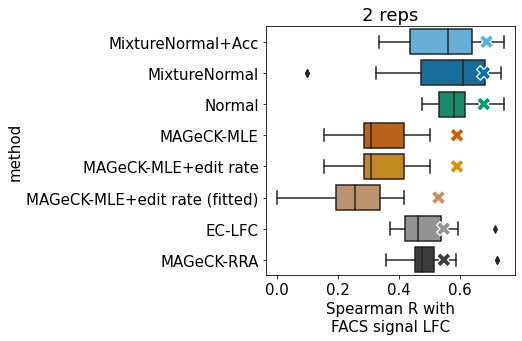

In [79]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(corr_subsamples, y = 'method', x = "corr", palette = method_pal, ax = ax, orient='h')
sns.scatterplot(corr_df, y = 'method', x = "corr", hue='method', palette = method_pal, ax = ax, s = 200, marker='X',zorder=100)
ax.get_legend().remove()
#ax.set_xlim((0,1))
ax.set_title("2 reps")
ax.set_xlabel("Spearman R with\nFACS signal LFC")
plt.setp(ax, box_aspect=1)
plt.tight_layout()
fig.savefig("3g_all_and_subsamples_single.pdf", bbox_inches="tight")

In [80]:
corr_df.to_csv("Fig3d_allreps.csv")
corr_subsamples.to_csv("Fig3d_subsamples.csv")

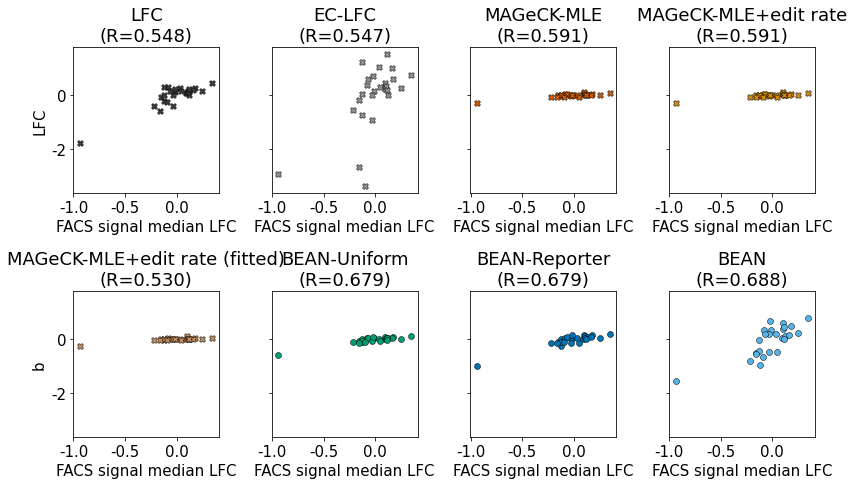

In [88]:
plt.style.use('jr')
fig, ax = plt.subplots(2, 4, figsize=(12,7), sharey = True)
ax[0, 0].set_title(f"LFC\n(R={plot_tbl[['Combined Target median LFC', 'rra_lfc']].corr('spearman').iloc[0,1]:.3f})")
sns.scatterplot(plot_tbl, x="Combined Target median LFC", y="rra_lfc", color = method_pal["MAGeCK-RRA"], marker="X", edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_ylabel("LFC")

ax[0, 1].set_title(f"EC-LFC\n(R={plot_tbl[['Combined Target median LFC', 'nLFC']].corr('spearman').iloc[0,1]:.3f})")
sns.scatterplot(plot_tbl, x="Combined Target median LFC", y="nLFC", color = method_pal["EC-LFC"], marker="X", edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_ylabel("EC-LFC")

i = 2
for col, model in mageck_label_map_beta.items():
    ax[i//4, i%4].set_title(f"{model}\n(R={plot_tbl[['Combined Target median LFC', col]].corr('spearman').iloc[0,1]:.3f})")
    sns.scatterplot(plot_tbl, x="Combined Target median LFC", y=col, color=method_pal[model], marker="X", edgecolor='black', ax = ax[i//4, i%4])
    ax[i//4, i%4].set_ylabel("b")
    i += 1
    
for model in bean_models:
    label = {"Normal":"BEAN-Uniform", "MixtureNormal":"BEAN-Reporter", "MixtureNormal+Acc":"BEAN"}[model]
    col = f"mu_{model}"
    ax[i//4, i%4].set_title(f"{label}\n(R={plot_tbl[['Combined Target median LFC', col]].corr('spearman').iloc[0,1]:.3f})")
    sns.scatterplot(plot_tbl, x="Combined Target median LFC", y=col, color=method_pal[model],  edgecolor='black', ax = ax[i//4, i%4])
    ax[i//4, i%4].set_ylabel("mu")
    i += 1
    

plt.setp(ax, box_aspect=1, xlabel = "FACS signal median LFC")
plt.tight_layout()
fig.savefig("S4b_correlation_scatter_sharey.pdf",bbox_inches='tight')

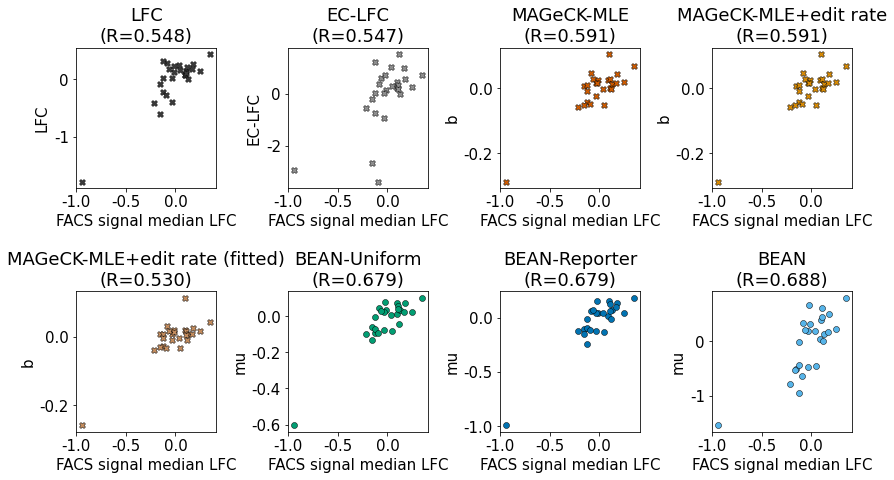

In [89]:
plt.style.use('jr')
fig, ax = plt.subplots(2, 4, figsize=(12,7))

ax[0, 0].set_title(f"LFC\n(R={plot_tbl[['Combined Target median LFC', 'rra_lfc']].corr('spearman').iloc[0,1]:.3f})")
sns.scatterplot(plot_tbl, x="Combined Target median LFC", y="rra_lfc", color = method_pal["MAGeCK-RRA"], marker="X", edgecolor='black', ax = ax[0, 0])
ax[0, 0].set_ylabel("LFC")


ax[0, 1].set_title(f"EC-LFC\n(R={plot_tbl[['Combined Target median LFC', 'nLFC']].corr('spearman').iloc[0,1]:.3f})")
sns.scatterplot(plot_tbl, x="Combined Target median LFC", y="nLFC", color = method_pal["EC-LFC"], marker="X", edgecolor='black', ax = ax[0, 1])
ax[0, 1].set_ylabel("EC-LFC")

i = 2
for col, model in mageck_label_map_beta.items():
    ax[i//4, i%4].set_title(f"{model}\n(R={plot_tbl[['Combined Target median LFC', col]].corr('spearman').iloc[0,1]:.3f})")
    sns.scatterplot(plot_tbl, x="Combined Target median LFC", y=col, color=method_pal[model], marker="X", edgecolor='black', ax = ax[i//4, i%4])
    ax[i//4, i%4].set_ylabel("b")
    i += 1
    
for model in bean_models:
    label = {"Normal":"BEAN-Uniform", "MixtureNormal":"BEAN-Reporter", "MixtureNormal+Acc":"BEAN"}[model]
    col = f"mu_{model}"
    ax[i//4, i%4].set_title(f"{label}\n(R={plot_tbl[['Combined Target median LFC', col]].corr('spearman').iloc[0,1]:.3f})")
    sns.scatterplot(plot_tbl, x="Combined Target median LFC", y=col, color=method_pal[model],  edgecolor='black', ax = ax[i//4, i%4])
    ax[i//4, i%4].set_ylabel("mu")
    i += 1
    

plt.setp(ax, box_aspect=1, xlabel = "FACS signal median LFC")
plt.tight_layout()
fig.savefig("S4b_correlation_scatter.pdf",bbox_inches='tight')